# Predict the different species of flowers on the length of there petals and sepals

### Importing the libraries 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Load the Iris dataset


In [2]:
iris = datasets.load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (species)

### Imputation technique  

In [4]:
# Introduce some missing values to simulate incomplete data
np.random.seed(42)
missing_mask = np.random.rand(*X.shape) < 0.2
X[missing_mask] = np.nan
# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

### Split the imputed dataset into training and testing sets


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


In [6]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Classifiers

### K-Nearest Neighbors classifier


In [7]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Decision Tree classifier


In [8]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train, y_train)
y_pred_dt = decision_tree_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

### Random Forest classifier


In [9]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train, y_train)
y_pred_rf = random_forest_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


### Visualising Data

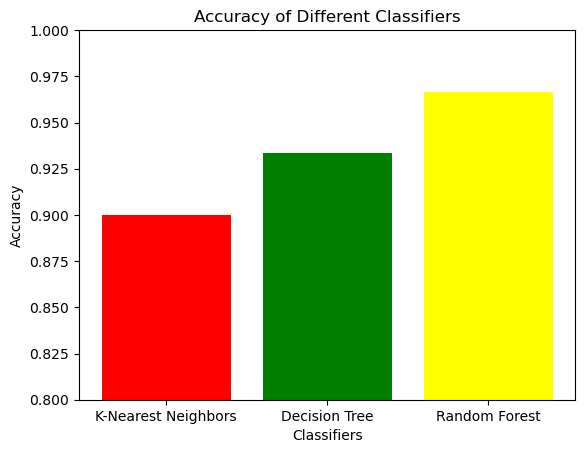

In [11]:
# Collect accuracy scores
classifiers = ['K-Nearest Neighbors', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_knn, accuracy_dt, accuracy_rf]

# Visualize accuracies
plt.bar(classifiers, accuracies, color=['red', 'green', 'yellow'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.show()